In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
from matplotlib.animation import FuncAnimation

***PAR REGION***

In [81]:
df_rgn = pd.read_csv('/content/scores - region.csv')

In [82]:
df_rgn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   region            264 non-null    object
 1   annee             264 non-null    object
 2   score_sportif     264 non-null    object
 3   score_economique  264 non-null    object
dtypes: object(4)
memory usage: 8.4+ KB


**Cleaning**

In [83]:
df_rgn['annee'] = df_rgn['annee'].str.replace('\u202f', '').astype(int)

df_rgn['score_sportif'] = df_rgn['score_sportif'].str.replace(',', '.').astype(float)
df_rgn['score_economique'] = df_rgn['score_economique'].str.replace(',', '.').astype(float)

print(df_rgn.info())
print(df_rgn.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            264 non-null    object 
 1   annee             264 non-null    int64  
 2   score_sportif     264 non-null    float64
 3   score_economique  264 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.4+ KB
None
   region  annee  score_sportif  score_economique
0  Alsace   2012          0.323            0.2635
1  Alsace   2013          0.348            0.2849
2  Alsace   2014          0.262            0.3033
3  Alsace   2015          0.273            0.3076
4  Alsace   2016          0.278            0.3226


**Evolution des scores au cours du temps**

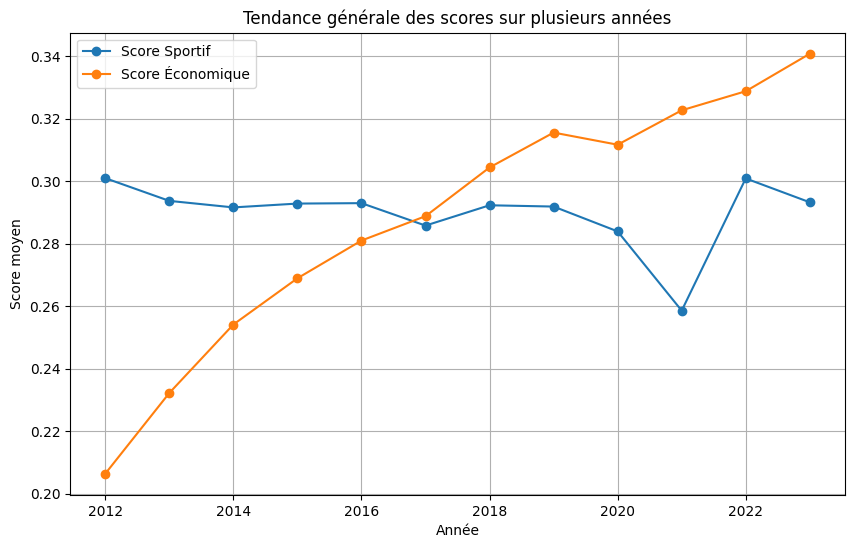

In [84]:
df_grouped_year = df_rgn.groupby("annee")[["score_sportif", "score_economique"]].mean()

df_grouped_year.plot(figsize=(10, 6), marker="o")
plt.title("Tendance générale des scores sur plusieurs années")
plt.xlabel("Année")
plt.ylabel("Score moyen")
plt.legend(["Score Sportif", "Score Économique"])
plt.grid()
plt.show()


**Evolution des scores par région au cours du temps**

In [85]:
def plot_scores(region):
    df_region = df_rgn[df_rgn["region"] == region].sort_values(by="annee")
    plt.figure(figsize=(10, 6))
    plt.plot(df_region["annee"], df_region["score_sportif"], label="Score Sportif", marker="o")
    plt.plot(df_region["annee"], df_region["score_economique"], label="Score Économique", marker="o")
    plt.title(f"Évolution des scores pour {region}")
    plt.xlabel("Année")
    plt.ylabel("Score")
    plt.legend()
    plt.grid()
    plt.show()

sorted_regions = sorted(df_rgn["region"].unique())

interact(plot_scores, region=sorted_regions)

interactive(children=(Dropdown(description='region', options=('Alsace', 'Aquitaine', 'Auvergne', 'Basse-Norman…

<function __main__.plot_scores(region)>

**Corrélation entre les scores**

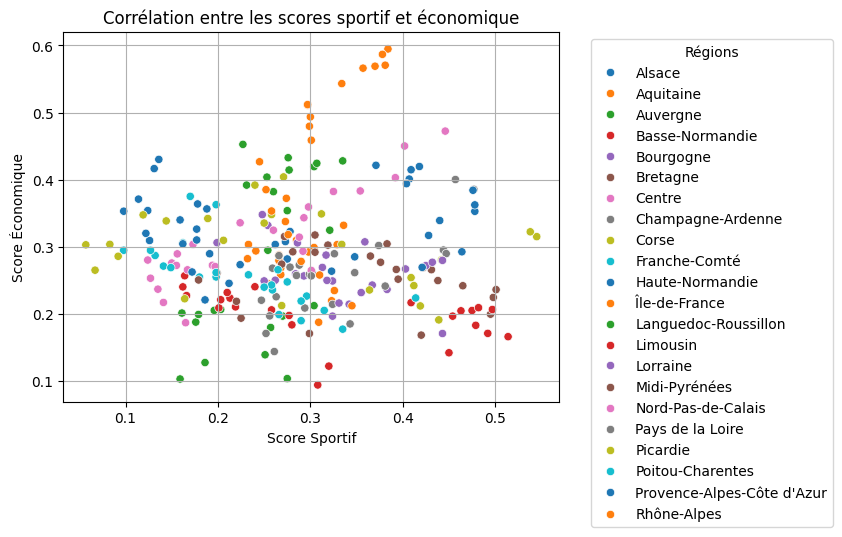

In [86]:
sns.scatterplot(data=df_rgn, x="score_sportif", y="score_economique", hue="region", palette="tab10")
plt.title("Corrélation entre les scores sportif et économique")
plt.xlabel("Score Sportif")
plt.ylabel("Score Économique")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Régions")
plt.grid()
plt.show()

**Heatmap de corrélation**

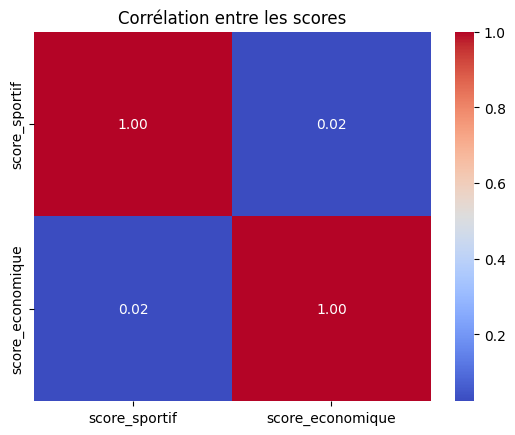

In [87]:
corr = df_rgn[["score_sportif", "score_economique"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les scores")
plt.show()

***PAR DEPARTEMENT***

In [88]:
df_dpt = pd.read_csv('/content/scores - departement.csv')

In [89]:
df_dpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   departement       859 non-null    object
 1   region            859 non-null    object
 2   annee             859 non-null    object
 3   score_sportif     859 non-null    object
 4   score_economique  859 non-null    object
dtypes: object(5)
memory usage: 33.7+ KB


**Cleaning**

In [90]:
df_dpt['annee'] = df_dpt['annee'].str.replace('\u202f', '').astype(int)

df_dpt['score_sportif'] = df_dpt['score_sportif'].str.replace(',', '.').astype(float)
df_dpt['score_economique'] = df_dpt['score_economique'].str.replace(',', '.').astype(float)

print(df_dpt.info())
print(df_dpt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   departement       859 non-null    object 
 1   region            859 non-null    object 
 2   annee             859 non-null    int64  
 3   score_sportif     859 non-null    float64
 4   score_economique  859 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.7+ KB
None
  departement         region  annee  score_sportif  score_economique
0       Paris  Île-de-France   2021          0.870             1.000
1       Paris  Île-de-France   2019          0.951             0.966
2       Paris  Île-de-France   2020          0.934             0.944
3       Paris  Île-de-France   2023          1.000             0.934
4       Paris  Île-de-France   2018          0.902             0.926


**Evolution des scores au cours du temps**

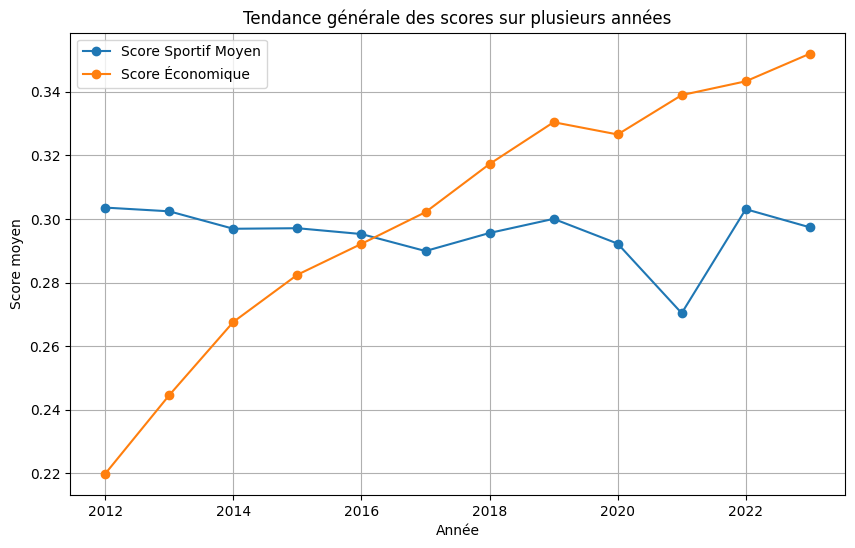

In [91]:
df_grouped_year = df_dpt.groupby("annee")[["score_sportif", "score_economique"]].mean()

df_grouped_year.plot(figsize=(10, 6), marker="o")
plt.title("Tendance générale des scores sur plusieurs années")
plt.xlabel("Année")
plt.ylabel("Score moyen")
plt.legend(["Score Sportif Moyen", "Score Économique"])
plt.grid()
plt.show()


**Evolution des scores par département au cours du temps**

In [92]:
def plot_scores(departement):
    df_departement = df_dpt[df_dpt["departement"] == departement].sort_values(by="annee")
    plt.figure(figsize=(10, 6))
    plt.plot(df_departement["annee"], df_departement["score_sportif"], label="Score Sportif", marker="o")
    plt.plot(df_departement["annee"], df_departement["score_economique"], label="Score Économique", marker="o")
    plt.title(f"Évolution des scores pour {departement}")
    plt.xlabel("Année")
    plt.ylabel("Score")
    plt.legend()
    plt.grid()
    plt.show()

sorted_departements = sorted(df_dpt["departement"].unique())

interact(plot_scores, departement=sorted_departements)

interactive(children=(Dropdown(description='departement', options=('Ain', 'Aisne', 'Allier', 'Alpes-Maritimes'…

<function __main__.plot_scores(departement)>

**Corrélation entre les scores**

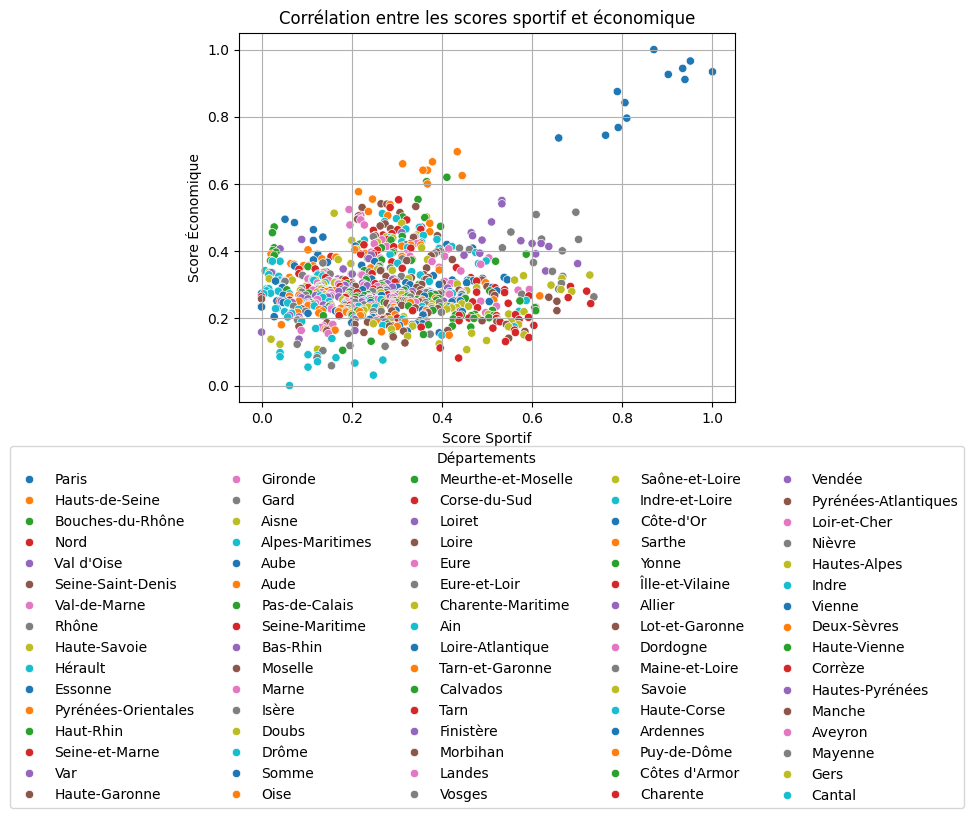

In [93]:
sns.scatterplot(data=df_dpt, x="score_sportif", y="score_economique", hue="departement", palette="tab10")
plt.title("Corrélation entre les scores sportif et économique")
plt.xlabel("Score Sportif")
plt.ylabel("Score Économique")
plt.legend(bbox_to_anchor=(0.5, -0.1), loc="upper center", title="Départements", ncol=5)
plt.grid()
plt.show()

**Heatmap de corrélation**

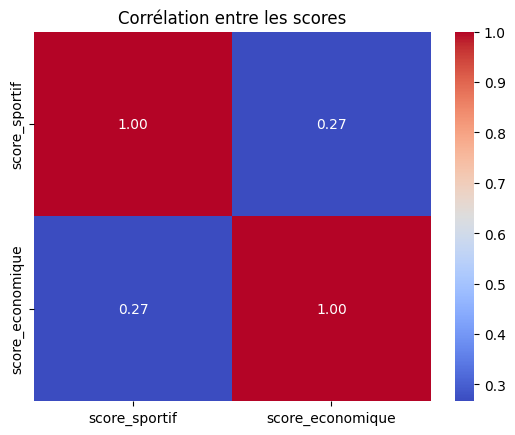

In [94]:
corr = df_dpt[["score_sportif", "score_economique"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les scores")
plt.show()

***PAR COMMUNE***

In [98]:
df_com = pd.read_csv('/content/scores - commune.csv')

In [99]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ville             1296 non-null   object
 1   code_commune      1296 non-null   object
 2   departement       1296 non-null   object
 3   region            1296 non-null   object
 4   annee             1296 non-null   object
 5   score_sportif     1296 non-null   object
 6   score_economique  1296 non-null   object
dtypes: object(7)
memory usage: 71.0+ KB


**Cleaning**

In [100]:
df_com['annee'] = df_com['annee'].str.replace('\u202f', '').astype(int)

df_com['score_sportif'] = df_com['score_sportif'].str.replace(',', '.').astype(float)
df_com['score_economique'] = df_com['score_economique'].str.replace(',', '.').astype(float)

print(df_com.info())
print(df_com.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ville             1296 non-null   object 
 1   code_commune      1296 non-null   object 
 2   departement       1296 non-null   object 
 3   region            1296 non-null   object 
 4   annee             1296 non-null   int64  
 5   score_sportif     1296 non-null   float64
 6   score_economique  1296 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 71.0+ KB
None
       ville code_commune       departement                      region  \
0      Paris        75056             Paris               Île-de-France   
1  Marseille        13055  Bouches-du-Rhône  Provence-Alpes-Côte d'Azur   
2      Paris        75056             Paris               Île-de-France   
3      Paris        75056             Paris               Île-de-France   
4      Paris        75056   

**Evolution des scores au cours du temps**

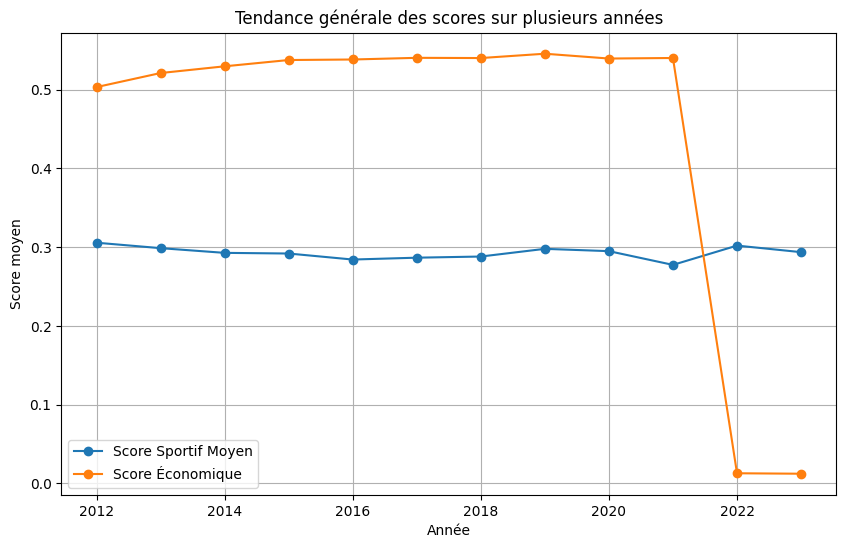

In [101]:
df_grouped_year = df_com.groupby("annee")[["score_sportif", "score_economique"]].mean()

df_grouped_year.plot(figsize=(10, 6), marker="o")
plt.title("Tendance générale des scores sur plusieurs années")
plt.xlabel("Année")
plt.ylabel("Score moyen")
plt.legend(["Score Sportif Moyen", "Score Économique"])
plt.grid()
plt.show()